In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load the dataset
def collectDataset(path):
    
    data = pd.read_csv(path)
    return data
path='../input/creditcardfraud/creditcard.csv'
data = collectDataset(path)

In [3]:
#exploring dataset 
def exploring_dataset(dataframe,columns=False,shape=False,describe=True):
    if(columns is not False):
        print(f"Name of columns : {dataframe.columns}")
    if(shape is not False):
        print(f"Shape of dataframe is {dataframe.shape}")
        
    
    if(describe is not False):
        print("Statistics Description of the dataset is - ")
        print(dataframe.describe)
exploring_dataset(data,columns=True,shape=True)

Name of columns : Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Shape of dataframe is (284807, 31)
Statistics Description of the dataset is - 
<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789 

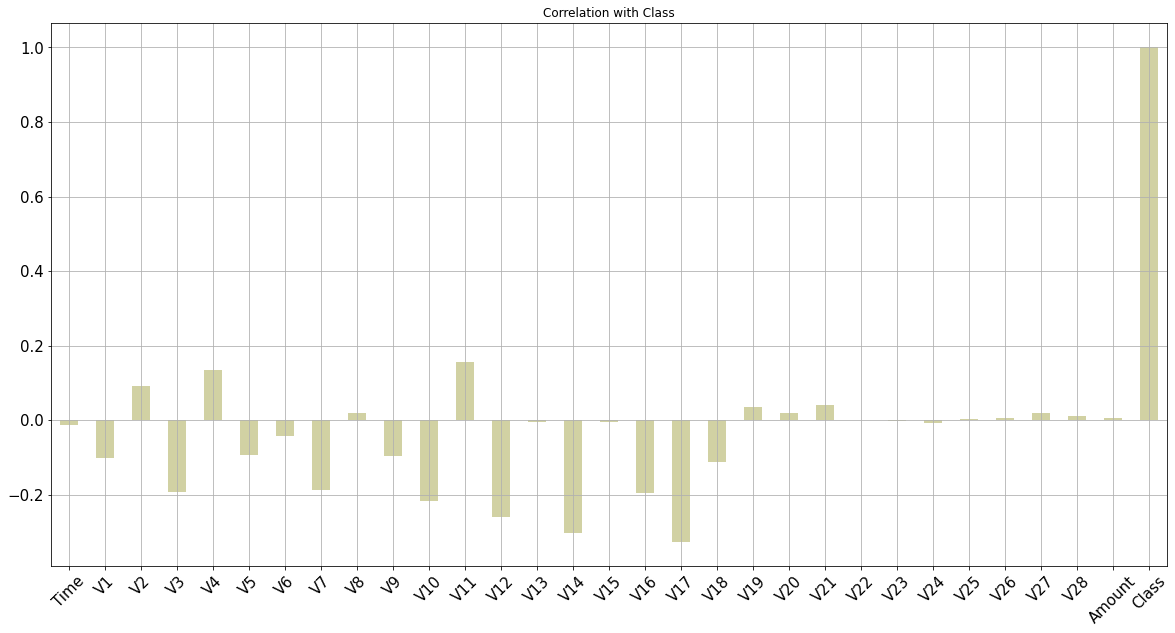

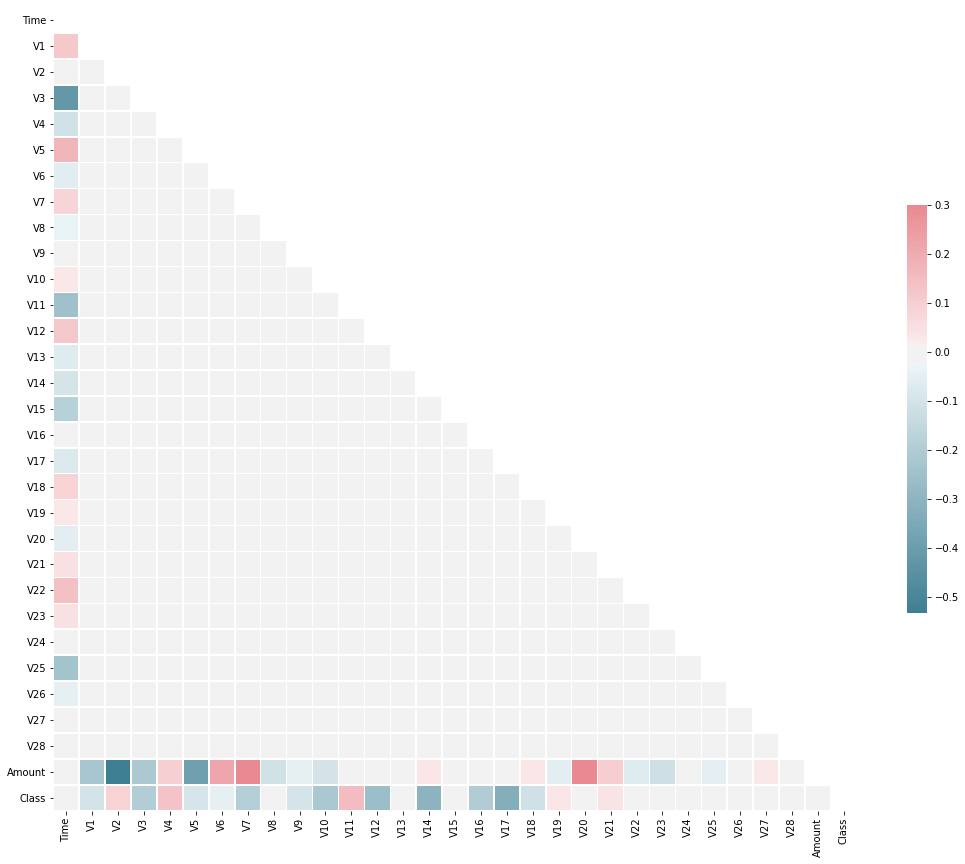

In [4]:
def visualize_data(dataframe,correlation=True,heatmap=True):
    if(correlation is not False):
        dataframe.corrwith(dataframe.Class).plot.bar(
        figsize = (20,10),title = "Correlation with Class",
        fontsize =15,
        rot =45,
    color=(0.8, 0.8, 0.6, 0.9),
        grid=True
    )
    if(heatmap is not False):
        corr = dataframe.corr()
        mask =  np.zeros_like(corr,dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

        f,ax= plt.subplots(figsize=(18,15))
        cmap = sns.diverging_palette(220,10,as_cmap=True)
        sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5})
        
        
visualize_data(data)

In [5]:
#sampling dataset
def sample_data(data,frac=0.1,random_state=1):
    
    data = data.sample(frac=0.1,random_state=1)
    print(f"Dataframe Shape is {data.shape}")
sample_data(data,frac=0.2,random_state=1)

Dataframe Shape is (28481, 31)


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

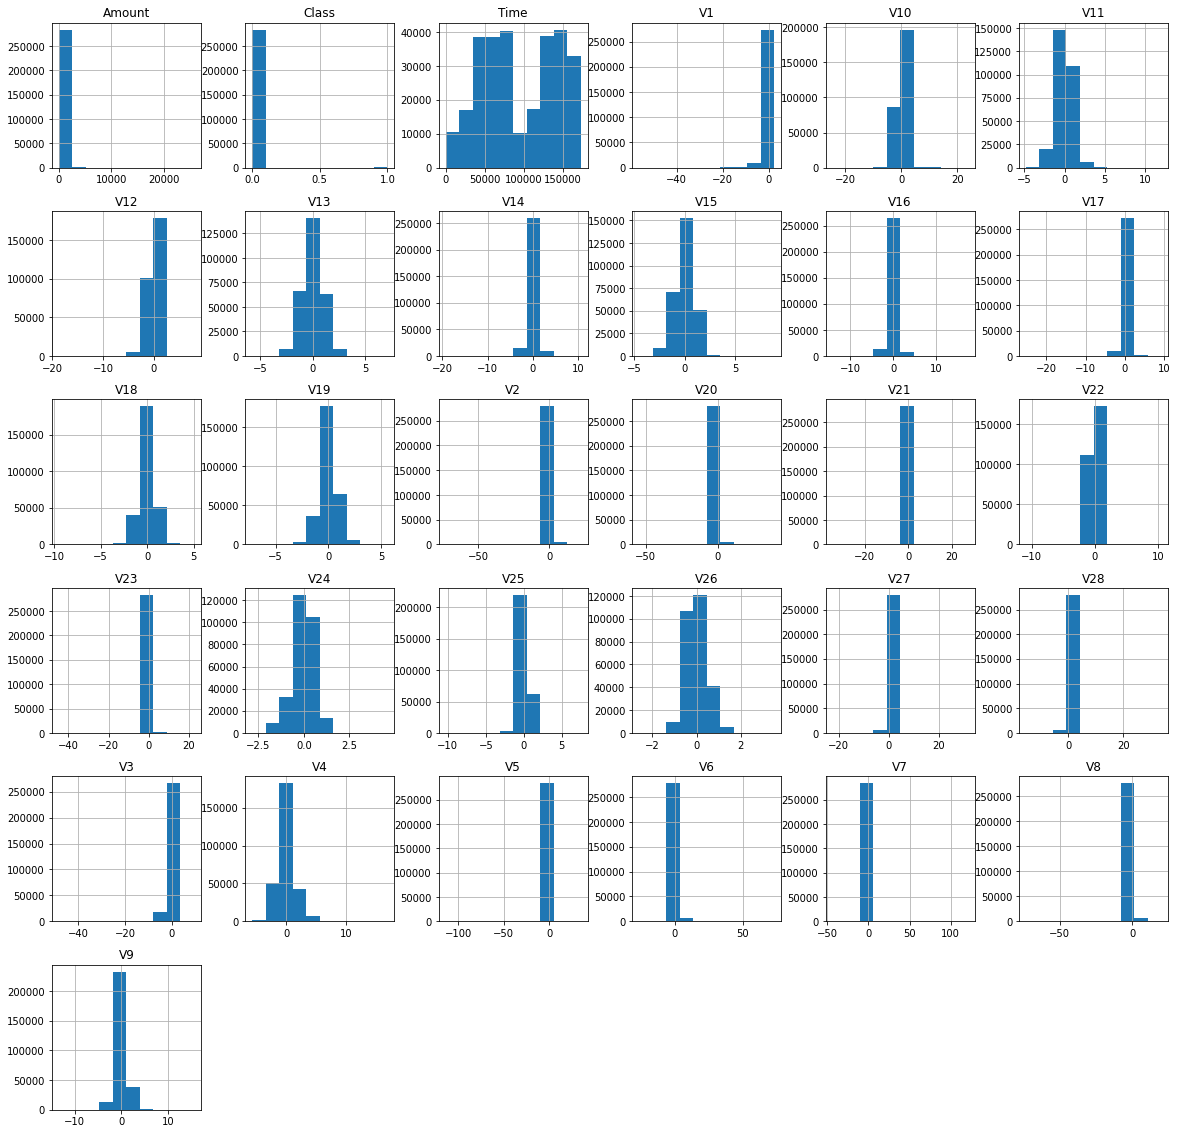

In [6]:
#plot histogram of each parameter
def histogram(data):
    data.hist(figsize=(20,20))
    plt.show()
histogram(data)

In [7]:
#defining a class to findout cases of Fraud and Valid

Fraud = data[data['Class']==1]
Valid = data[data['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
def findTotalCase(Fraud,Valid):
    
    print("Fraud Case : {}".format(len(Fraud)))
    print("Valid Case : {}".format(len(Valid)))
findTotalCase(Fraud,Valid)

0.0017304750013189597
Fraud Case : 492
Valid Case : 284315


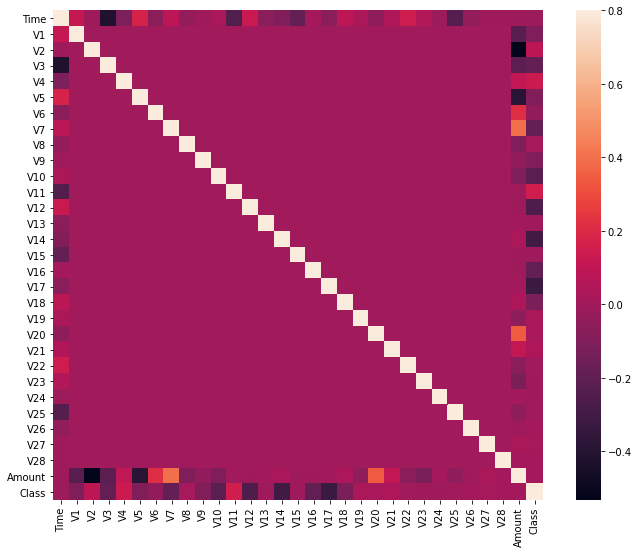

In [8]:
#seeing the corelation matrix
def corelation_matrix(data):
    corrmat =data.corr()
    fig =plt.figure(figsize=(12,9))

    sns.heatmap(corrmat,vmax=.8,square=True)
corelation_matrix(data)

# Making Dataframe feature(X) and label(y)

In [9]:
#get all the columns from the Dataframe
columns= data.columns.tolist()

#filter the columns to remove the data we don't need
columns = [c for c in columns if c not in ['Class']]

#store the variable we target to predict
target ='Class'
X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


# Applying algorithm to the dataset

In [10]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define random state
state =1

#define outlier detection method
classifiers ={
    "Isolation Forest": IsolationForest(max_samples=len(X), contamination=outlier_fraction,random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)
}

In [11]:
#fit the model
n_outliers = len(Fraud)

for i, (clf_name,clf) in enumerate(classifiers.items()):
    #fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    # reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] =0
    y_pred[y_pred == -1] =1
    
    n_errors = (y_pred != Y).sum()
    
    #Run classification metrics
    print('{}:{}'.format(clf_name,n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))

Isolation Forest:645
0.997735308472053
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.35      0.35       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor:935
0.9967170750718908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



In [12]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)
data = data.drop(['Time'],axis=1)
data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.338556
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.333279
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,-0.190107
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,0.019392
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-0.338516


# Model Training For Neural Network


In [13]:
X = data.iloc[:,data.columns != 'Class']
y = data.iloc[:,data.columns == 'Class']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [14]:
#decision tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
classfier = DecisionTreeClassifier(random_state=0,
                                   criterion='gini',
                                  splitter='best',
                                   min_samples_leaf=1,
                                   min_samples_split=2
                                  )
classfier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [15]:
#prediction of test set
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
y_pred = classfier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [16]:
results = pd.DataFrame([['Decision Tree',acc,prec,rec,f1]],
                      columns = ['Model','Accuracy','Precision','Recall','F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.999333,0.835821,0.761905,0.797153


## Confusion Matrix

Test data Accuracy: 0.9993 


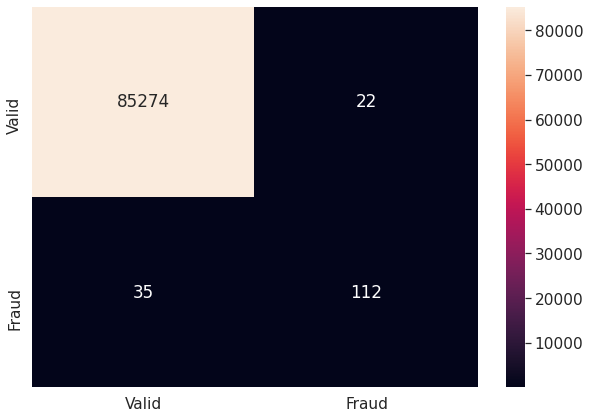

In [17]:
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm,index=('Valid','Fraud'),columns=('Valid','Fraud'))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,fmt='g')
print("Test data Accuracy: %0.4f "%accuracy_score(y_test,y_pred))

## Applying Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=0,
                                   n_estimators=100,
                                   criterion='entropy',
                                   )
classfier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [19]:
#prediction on test data
y_pred = classfier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
prec =precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [20]:
another = pd.DataFrame([['Random Forest',acc,prec,rec,f1]],
                      columns = ['Model','Accuracy','Precision','Recall','F1 Score'])

In [21]:
results= results.append(another,ignore_index=True)

In [22]:
#see the final result after randomforest
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.999333,0.835821,0.761905,0.797153
1,Random Forest,0.999333,0.835821,0.761905,0.797153


# A simple handsome ANN

In [23]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report , confusion_matrix,accuracy_score

In [24]:
def creating_model():
    classfier = Sequential()
    classfier.add(Dense(units=15,kernel_initializer='uniform',activation='relu',input_dim=29))

    classfier.add(Dense(units=12,kernel_initializer='uniform',activation='relu'))
    classfier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
    return classfier
classfier= creating_model()

In [25]:
#model architecture
classfier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                450       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                192       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 655
Trainable params: 655
Non-trainable params: 0
_________________________________________________________________


In [26]:
#compiling the model
"""
here optimizer is used adam
loss is binary_crossentropy for fraud and valid detection
"""
classfier.compile(optimizer='adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [27]:
# Training classifier
classfier.fit(X_train, y_train, batch_size = 16, epochs = 5,validation_split=0.1)

Train on 179427 samples, validate on 19937 samples
Epoch 1/5
179427/179427 [==============================] - 35s 194us/sample - loss: 0.0123 - accuracy: 0.9985 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 2/5
179427/179427 [==============================] - 34s 187us/sample - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 3/5
179427/179427 [==============================] - 34s 189us/sample - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 4/5
179427/179427 [==============================] - 34s 192us/sample - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 5/5
179427/179427 [==============================] - 35s 192us/sample - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9993


In [28]:
# Prediction of Test Set

y_pred = classfier.predict(X_test)
y_pred = (y_pred > 0.5)
score = classfier.evaluate(X_test,y_test)
score

85443/85443 [==============================] - 5s 61us/sample - loss: 0.0035 - accuracy: 0.9994


[0.003527988206373576, 0.9994031]

## Classification report for ANN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.86      0.78      0.82       147

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Test data accuracy: 0.9994


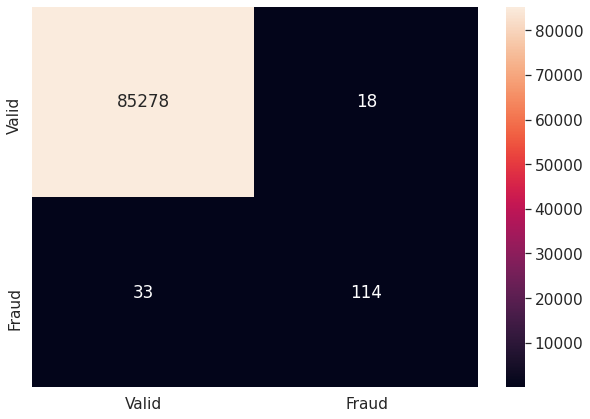

In [29]:
def find_matrices(y_test,y_pred):
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(cm,index=("Valid","Fraud"),columns=("Valid","Fraud"))
    plt.figure(figsize=(10,7))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm,annot=True,fmt='g')
    print("Test data accuracy: %0.4f" %accuracy_score(y_test,y_pred))
find_matrices(y_test,y_pred)